In [1]:
0.077

0.077

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Načítanie CSV
df = pd.read_csv("../.scratch/gfootball_eval.csv", header=None, sep=",")

# Prvý stĺpec je "left" alebo "right"
df['side'] = df[0]

# Zvyšok sú hodnoty – konvertuj každý riadok na numpy array (ignoruj prvý stĺpec)
df['values'] = df.iloc[:, 1:-1].apply(lambda row: row.astype(float).values, axis=1)


In [3]:
# Oddelenie podľa tímu
left_actions = df[df['side'] == 'left']['values'].tolist()
right_actions = df[df['side'] == 'right']['values'].tolist()

In [4]:
# Zarovnáme všetky akcie na rovnakú dĺžku (minimálnu spoločnú)
min_len = min(min(len(a) for a in left_actions), min(len(a) for a in right_actions))

# Vytvorenie numpy array a výpočet priemeru
left_avg = np.mean(np.array([a[:min_len] for a in left_actions]), axis=0)
right_avg = np.mean(np.array([a[:min_len] for a in right_actions]), axis=0)

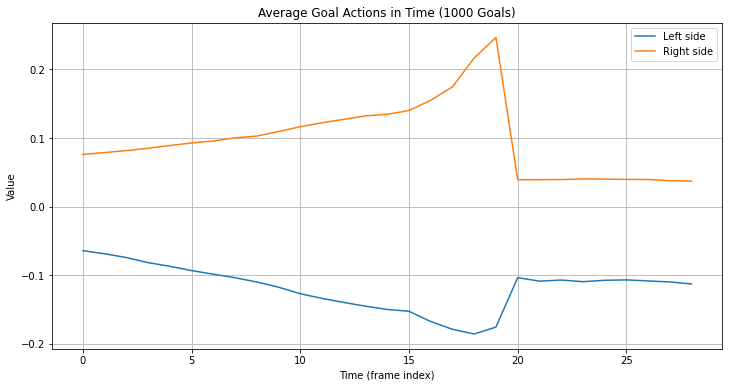

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(left_avg, label="Left side")
plt.plot(right_avg, label="Right side")
plt.title("Average Goal Actions in Time (1000 Goals)")
plt.xlabel("Time (frame index)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def is_goal_by_max(action_array, threshold=0.227):
    return np.max(np.abs(action_array)) > threshold

def is_goal_by_second_derivative(action_array, threshold=0.081):
    second_deriv = np.abs(np.diff(action_array, n=2))
    return np.max(second_deriv) > threshold

# Použitie detekcií na všetky riadky
df['goal_max'] = df['values'].apply(is_goal_by_max)
df['goal_deriv'] = df['values'].apply(is_goal_by_second_derivative)

# Funkcia na výpis štatistiky
def print_stats(method_name, column):
    total = len(df)
    total_goals = df[column].sum()
    print(f"\n[{method_name}] Celkovo: {total_goals}/{total} = {100 * total_goals / total:.2f}%")

    for side in ['left', 'right']:
        side_df = df[df['side'] == side]
        goals = side_df[column].sum()
        print(f"  {side.capitalize()}: {goals}/{len(side_df)} = {100 * goals / len(side_df):.2f}%")

# Výpis
print_stats("Max Threshold", 'goal_max')
print_stats("Second Derivative", 'goal_deriv')


[Max Threshold] Celkovo: 554/997 = 55.57%
  Left: 170/360 = 47.22%
  Right: 384/637 = 60.28%

[Second Derivative] Celkovo: 855/997 = 85.76%
  Left: 276/360 = 76.67%
  Right: 579/637 = 90.89%
